In [69]:
import matplotlib.pyplot as plt
import torch
import torchvision

In [58]:
# load images
xray = plt.imread('./Data/img_000/xRay.jpg')
mask = plt.imread('./Data/img_000/mask.jpg')[:, :, 0]
mask_pathology = plt.imread('./Data/img_000/mask_pathology.jpg')
dentist_vision = plt.imread('./Data/img_000/dentist_vision.jpg')[:, :, 0]

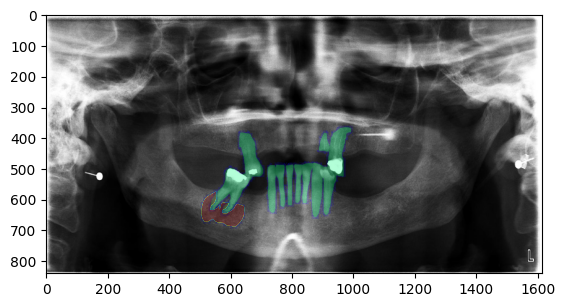

In [134]:
# show ground truth
plt.imshow(xray, cmap='gray')
plt.imshow(mask, cmap='winter', alpha=0.3*(mask>0))
plt.imshow(mask_pathology, cmap='jet', alpha=0.3*(mask_pathology>0))

Make predictions using a pre-trained Mask-RCNN, nonesense prediction since model needs to be trained

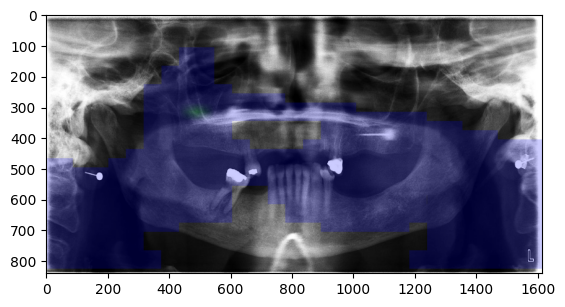

In [137]:
# load mask rcnn model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights='MaskRCNN_ResNet50_FPN_Weights.DEFAULT')

# convert to tensor
torch_image = [torch.tensor(xray).permute(2, 0, 1).float()]

# make prediction
model.eval()
predictions = model(torch_image)
prediction_mask = predictions[0]['masks'][4, :, :, :].detach().numpy().squeeze(0)

# show
plt.imshow(xray, cmap='gray')
plt.imshow(prediction_mask, cmap='winter', alpha=0.2*(prediction_mask>0))